<a href="https://colab.research.google.com/github/srilasya1815/FMMLlab2024/blob/main/Module_6_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Akshit Garg
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


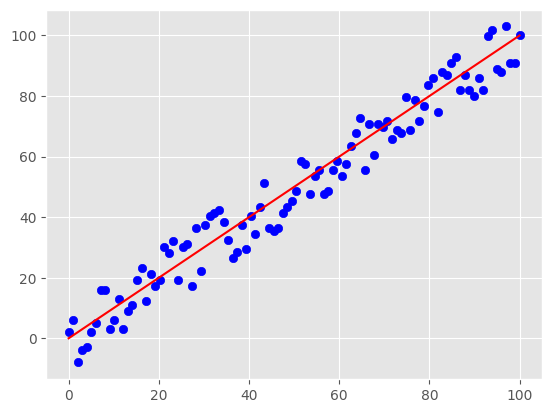

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

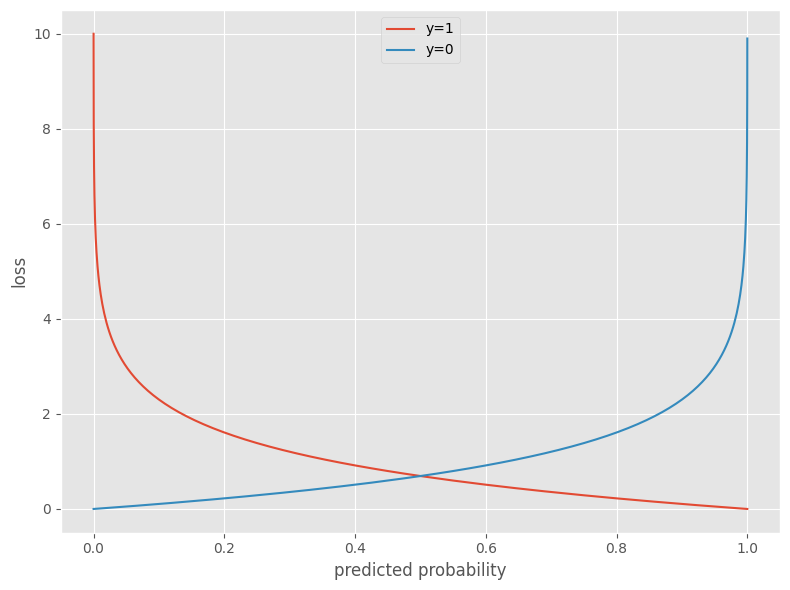

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

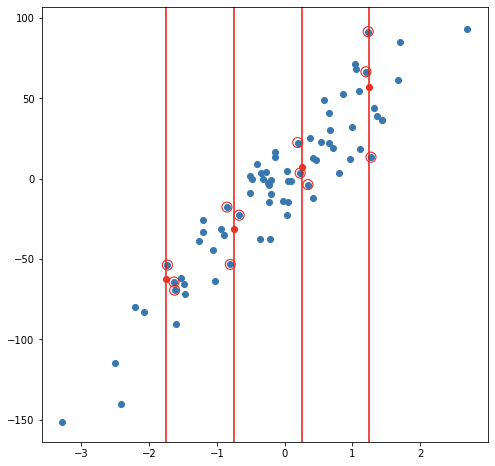

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-8-16fc6f082614>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-8-16fc6f082614>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

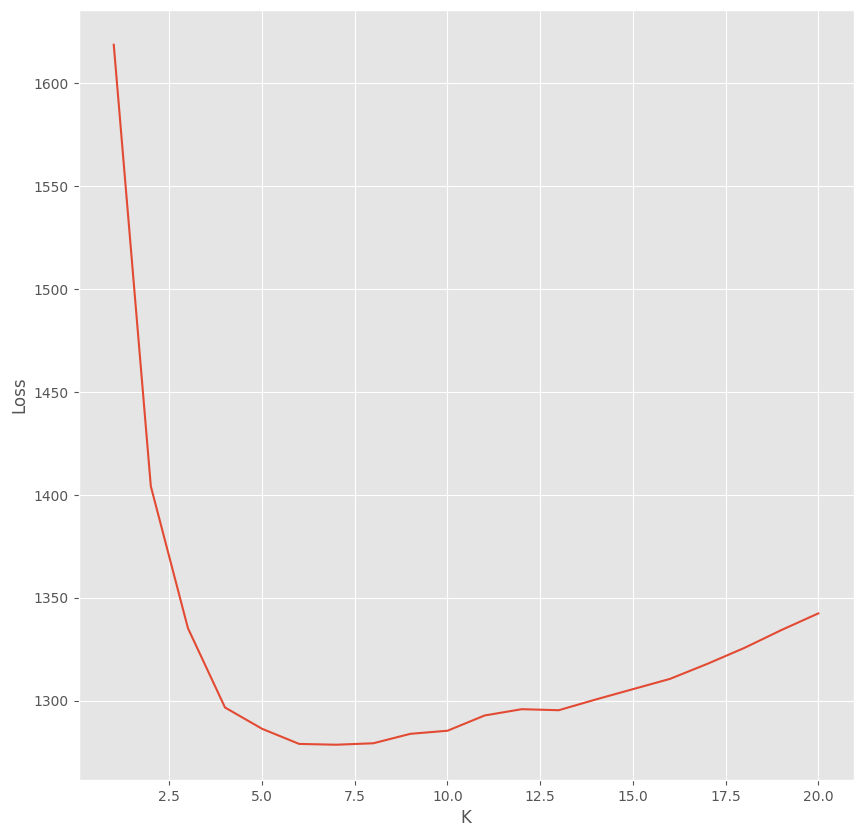

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

#Exercises
# 1.Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Create a synthetic dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature, values between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Target variable with some noise

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Calculate and evaluate different loss functions
# ... (rest of the code for calculating MSE, RMSE, MAE, Huber, Log-Cosh, Quantile is the same) ...

**Explanation of Changes**:
   1. **Synthetic Dataset**:
       * np.random.seed(42): Sets a random seed for reproducibility, so you get the same results each time you run the code.
       * X: Creates a NumPy array of 100 random numbers between 0 and 10, representing the feature values.
       * y: Creates the target variable based on the formula 2 * X + 1 (a simple linear relationship), and adds some random noise using np.random.randn() to make it more realistic.

  2. **Rest of the Code:** The code for splitting the data, training the model, making predictions, and calculating the loss functions remains the same as before.


# 2. Explore other loss functions and try to understand when and why they are used.

In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a pandas DataFrame
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data['target'] = housing.target # Add the target variable to the DataFrame

# Display the first few rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Explanation**:

    **Import**: We import fetch_california_housing from sklearn.datasets and pandas to work with DataFrames.
    Fetch: fetch_california_housing(as_frame=True) downloads the dataset and returns it as a pandas DataFrame (using as_frame=True).
    DataFrame:
        We create a DataFrame data from the dataset's features (housing.data) and feature names (housing.feature_names).
        We add the target variable (housing.target) as a new column called 'target' to the DataFrame.
    Display: data.head() shows the first few rows of the dataset so you can see its structure

## 3.Try out KNN-regression on other datasets see which values of K give the best results.

**1. Choose Datasets**:

   * You can use datasets available in scikit-learn (like the California Housing Prices dataset we used earlier) or load your own datasets. Here are some options:
       * fetch_california_housing (from sklearn.datasets)
       * load_boston (from sklearn.datasets, but be cautious as it contains potentially sensitive information)
       * load_diabetes (from sklearn.datasets)
       * Your own datasets in CSV or other formats (make sure to load them using pd.read_csv or appropriate methods).

**2. Prepare Data:**

   **Load**: If using your own dataset, load it using pd.read_csv or similar methods.

  **Preprocessing**:
        Handle missing values (e.g., using imputation).
        Consider feature scaling (e.g., using StandardScaler or MinMaxScaler).
        Convert categorical features to numerical using one-hot encoding if necessary.

   **Split**: Divide the data into training and testing sets using train_test_split.
    


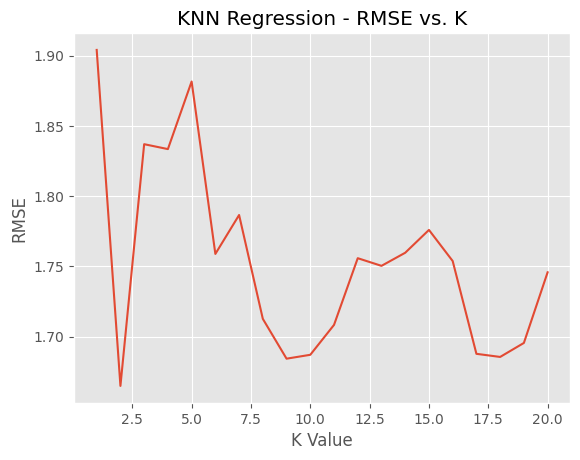

Optimal K value: 2


In [15]:
#KNN REGRESSION and EVALUATION :
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_values = []
k_values = range(1, 21)  # Try K values from 1 to 20

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plot RMSE vs. K
plt.plot(k_values, rmse_values)
plt.xlabel("K Value")
plt.ylabel("RMSE")
plt.title("KNN Regression - RMSE vs. K")
plt.show()

# Find optimal K
optimal_k = k_values[np.argmin(rmse_values)]
print(f"Optimal K value: {optimal_k}")

**Explanation**:

   1. Import: Import necessary libraries.
   2. Loop: Iterate through different K values (from 1 to 20 in this example).
   3. Train and Predict: Train a KNN Regressor model with the current K value and make predictions on the test set.
   4. Calculate RMSE: Calculate the Root Mean Squared Error (RMSE) to evaluate the model's performance.
   5.Store Results: Store the RMSE value for the current K.
   6.Plot: Plot the RMSE values against the corresponding K values to visualize the relationship.
   7. Find Optimal K: Determine the K value that resulted in the lowest RMSE (indicating the best performance).


# 4.Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

let's explore the effects of setting K to 1 or the size of the whole training dataset in KNN regression.

**K = 1 (Nearest Neighbor)**

   * **Behavior**: When K is set to 1, the prediction for a new data point is simply the target value of its nearest neighbor in the training dataset.
  * **Effect**:

        **High variance**: The model becomes very sensitive to individual data points and noise. It's likely to overfit the training data, capturing even small variations that might not be representative of the true underlying pattern.
        **Complex decision boundary**: The decision boundary is highly irregular and can be overly flexible, leading to poor generalization to unseen data.

**K = Size of Training Dataset**

   Behavior: When K is equal to the size of the training dataset, the prediction for a new data point is the average of the target values of all training data points.
*  Effect:
      High bias: The model becomes overly simplistic and fails to capture the complexity of the data. It's likely to underfit, resulting in poor performance on both training and testing data.

* Smooth decision boundary: The decision boundary becomes very smooth, potentially ignoring important local patterns in the data.

**Key Takeaways**:

    Extreme K values lead to poor model performance.
    K = 1 is too sensitive to noise (overfitting).
    K = training dataset size is too simplistic (underfitting).
    Choose an optimal K to balance bias and variance.
    Use techniques like cross-validation to find the best K.




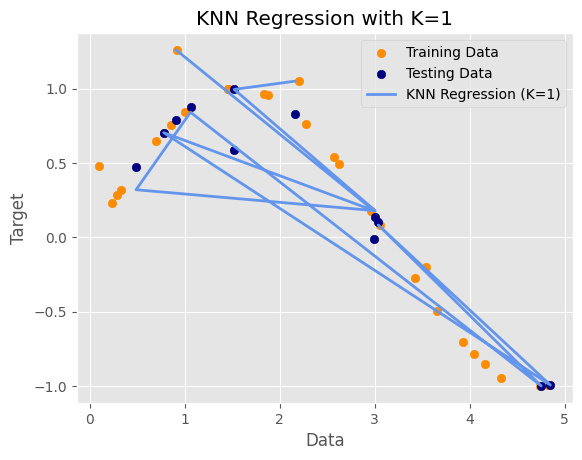

RMSE for K=1: 0.20320331802777403


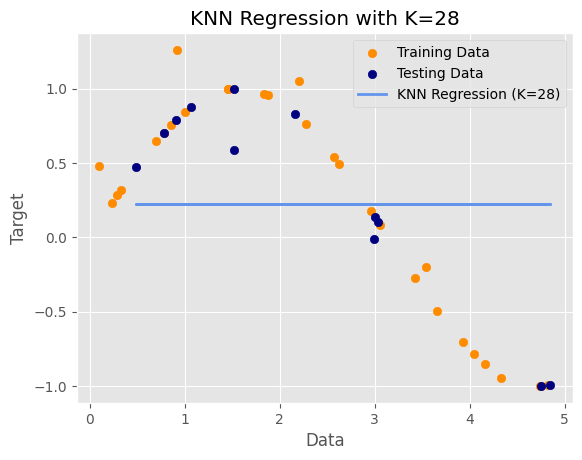

RMSE for K=28: 0.6572577781129418


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))  # Add some noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try K = 1 and K = size of training dataset
k_values = [1, len(X_train)]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure()
    plt.scatter(X_train, y_train, color='darkorange', label='Training Data')
    plt.scatter(X_test, y_test, color='navy', label='Testing Data')
    plt.plot(X_test, y_pred, color='cornflowerblue', label=f'KNN Regression (K={k})', linewidth=2)
    plt.xlabel("Data")
    plt.ylabel("Target")
    plt.title(f"KNN Regression with K={k}")
    plt.legend()
    plt.show()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for K={k}: {rmse}")

**How it Works**:

   1. **Synthetic Data**: Creates a dataset with a sinusoidal pattern and adds some noise.
   2. **Extreme K Values**: Defines k_values as [1, len(X_train)] to test K=1 and K=training data size.
   3. **Training and Prediction**: Trains a KNN regressor for each K value and makes predictions.
   4. **Visualization**: Plots the training data, testing data, and the model's predictions.
    RMSE Calculation: Calculates and prints the RMSE to evaluate performance.


## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood